# EDA Notebook

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

%matplotlib inline

## Reading in CSV

In [2]:
df = pd.read_csv("../data/archive/AviationData.csv", encoding='cp1252', low_memory=False)
# US_State_Codes = pd.read_csv('../data/archive/USState_Codes.csv', encoding='cp1252', low_memory=False)

## Data Cleaning

In [3]:
# Data Cleaning 
df.columns = df.columns.str.replace('.', ' ', regex=True)
df.columns = df.columns.str.title()
# dropping rows that are non-Airplane related
df = df[(df['Aircraft Category'] == 'Airplane')]
# dropping rows that are Amateur-Built aircraft
df = df[(df['Amateur Built'] == 'No')]
# capitalizing all Make strings to avoid double categories
df['Make'] = df['Make'].str.title() 
# capitalizing all Air Carrier strings to avoid double categories
df['Air Carrier'] = df['Air Carrier'].str.title() 
# capitalizing all Air Carrier strings to avoid double categories
df['Weather Condition'] = df['Weather Condition'].str.upper() 
# dropping unimportant columns, mostly ID numbers
df.drop(axis=1, inplace=True, labels=['Aircraft Category', 'Airport Code', 'Publication Date', 'Weather Condition',
                                      'Airport Name', 'Amateur Built', 'Event Id', 'Accident Number', 'Registration Number', 
                                      'Schedule', 'Broad Phase Of Flight', 'Latitude', 'Longitude', 'Air Carrier',
                                     'Report Status'])
# reconciling different index names under Far Description
df['Far Description'].replace(to_replace= '121', value='Part 121', inplace=True)
df['Far Description'].replace(to_replace= '135', value='Part 135', inplace=True)
df['Far Description'].replace(to_replace= '137', value='Part 137', inplace=True)
df['Far Description'].replace(to_replace= '129', value='Part 129', inplace=True)
df['Far Description'].replace(to_replace= 'Part 137', value='Part 137: Agricultural', inplace=True)
df['Far Description'].replace(to_replace= 'Part 135', value='Part 135: Air Taxi & Commuter', inplace=True)
df['Far Description'].replace(to_replace= 'Part 121', value='Part 121: Air Carrier', inplace=True)
df['Far Description'].replace(to_replace= 'Part 129', value='Part 129: Foreign', inplace=True)
df['Far Description'].replace(to_replace= 'Part 129', value='Part 129: Foreign', inplace=True)
df['Far Description'].replace(to_replace= 'NUSN', value='Non-U.S., Non-Commercial', inplace=True)
df['Far Description'].replace(to_replace= 'NUSC', value='Non-U.S., Commercial', inplace=True)
df['Far Description'].replace(to_replace= '091', value='Part 91: General Aviation', inplace=True)
df['Far Description'].replace(to_replace= '125', value='Part 125: 20+ Pax,6000+ lbs', inplace=True)
df['Far Description'].replace(to_replace= 'UNK', value='Unknown', inplace=True)
# dropping rows from far description that are not relevant
df = df[(df['Far Description']=='Part 91: General Aviation') | (df['Far Description']=='Non-U.S., Commercial') |
  (df['Far Description']=='Part 121: Air Carrier') | (df['Far Description']=='Part 129: Foreign') |
  (df['Far Description']=='Unknown')]
# cutting off events that occured before 1990
df = df[(df['Event Date'] > '1990-00-00')]

# df.head()

## Creating Seperate Dataframe For Severity Ratio Series

In [4]:
df_injuries = df[['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']].fillna(0)

# calculating severity ratio using injured divided by total people on 
severity = df_injuries['Total Fatal Injuries']*5 + df_injuries['Total Serious Injuries']*2.5 + df_injuries['Total Minor Injuries'] - df_injuries['Total Uninjured']*2

# adding severity ratio series into df_injuries dataframe
df_injuries['Severity Ratio'] = severity
df_injuries.reset_index(inplace=True, drop=True)

# adding model and make series into df_injuries dataframe
Make = pd.Series(name = 'Make', data = df['Make']).reset_index(drop=True)
Model_And_Make = pd.Series(name = 'Model & Make', data = (df['Make'] + ': ' + df['Model'])).reset_index(drop=True)
df_injuries['Model And Make'] = Model_And_Make
df_injuries['Make'] = Make
df_injuries.dropna(subset=['Model And Make'], inplace=True)

# df_injuries

In [5]:
top_50_makenmodel = list(df_injuries['Model And Make'].value_counts()[:50].index)

In [6]:
top_60_makes = list(df_injuries['Make'].value_counts()[:60].index)

In [7]:
df_injuries = df_injuries[(df_injuries['Make'].isin(top_60_makes))]
# df_injuries.info()

In [8]:
df_injuries['Make'].replace(to_replace= 'Cirrus Design Corp', value='Cirrus', regex=True, inplace=True)
df_injuries['Make'].replace(to_replace= 'Cirrus Design Corp.', value='Cirrus', regex=True, inplace=True)
df_injuries['Make'].replace(to_replace= 'Cessna Aircraft Co', value='Cessna', regex=True, inplace=True)
df_injuries['Make'].replace(to_replace= 'Aviat Aircraft Inc', value='Aviat', regex=True, inplace=True)
df_injuries['Make'].replace(to_replace= 'Diamond Aircraft Ind Inc', value='Diamond', regex=True, inplace=True)
df_injuries['Make'].replace(to_replace= 'Piper Aircraft Inc', value='Piper', regex=True, inplace=True)
df_injuries['Make'].replace(to_replace= 'American Champion Aircraft', value='American Champion', regex=True, inplace=True)
df_injuries['Make'].replace(to_replace= 'Champion', value='American Champion', regex=True, inplace=True)
df_injuries['Make'].replace(to_replace= 'Grumman American Avn. Corp.', value='Grumman', regex=True, inplace=True)
df_injuries['Make'].replace(to_replace= 'Bombardier Inc', value='Bombardier', regex=True, inplace=True)
df_injuries['Make'].replace(to_replace= 'Airbus Industrie', value='Airbus', regex=True, inplace=True)
df_injuries['Make'].replace(to_replace= 'Rockwell International', value='Rockwell', regex=True, inplace=True)
df_injuries['Make'].replace(to_replace= 'Mooney Aircraft Corp.', value='Mooney', regex=True, inplace=True)
df_injuries['Make'].replace(to_replace= 'Dehavilland', value='De Havilland', regex=True, inplace=True)
df_injuries['Make'].replace(to_replace= 'Flight Design Gmbh', value='Flight Design', regex=True, inplace=True)
df_injuries['Make'].replace(to_replace= 'Air Tractor', value='Air Tractor Inc', regex=True, inplace=True)
df_injuries['Make'].replace(to_replace= 'Evektor-Aerotechnik As', value='Evektor-Aerotechnik', regex=True, inplace=True)
df_injuries['Make'].replace(to_replace= 'Costruzioni Aeronautiche Tecna', value='Tecnam Costruzioni', regex=True, inplace=True)
df_injuries = df_injuries.sort_values('Make')


## Plotting Severity Ratio For Makes

In [9]:
# sns.set_theme()
# fig, ax = plt.subplots(figsize=(13,8))
# ax.scatter(x='Make', y='Severity Ratio', alpha=0.2, data= df_injuries)
# ax.tick_params(axis='x', labelsize=8, labelrotation=45)
# plt.tight_layout()

## Plotting Average Severity To Identify Best Makes

In [10]:
#groupby average
avg_sev_ratio_make = df_injuries.groupby('Make').mean(numeric_only=True)['Severity Ratio']
avg_sev_ratio_make_index = list(avg_sev_ratio_make.index)
avg_sev_ratio_make_value =  list(avg_sev_ratio_make.values)

In [11]:
# fig, ax = plt.subplots(figsize=(13,8))
# ax.scatter(x=avg_sev_ratio_make_index, y=avg_sev_ratio_make_value, alpha=1)
# ax.tick_params(axis='x', labelsize=8, labelrotation=45)
# plt.tight_layout()

In [12]:
# split private and commercial aircraft based on mean severity ratio (SplitMean)

SplitMean = -10

CommercialMake = {make: mean for make, mean in dict(avg_sev_ratio_make).items() if mean < SplitMean}
PrivateMake = {make: mean for make, mean in dict(avg_sev_ratio_make).items() if mean > SplitMean}
CommercialList = [make for make, mean in dict(avg_sev_ratio_make).items() if mean < SplitMean]
PrivateList = [make for make, mean in dict(avg_sev_ratio_make).items() if mean > SplitMean]
CommercialMake = pd.Series(CommercialMake, name = 'Commercial Make')
PrivateMake = pd.Series(PrivateMake, name = 'Private Make')

In [13]:
# plotting commercial aircraft severity means

# fig, ax = plt.subplots(figsize=(13,8))
# ax.scatter(x=list(CommercialMake.index), y=list(CommercialMake.values), alpha=1)
# ax.tick_params(axis='x', labelsize=8, labelrotation=45)
# plt.tight_layout()

In [14]:
# plotting private aircraft severity means

# fig, ax = plt.subplots(figsize=(13,8))
# ax.scatter(x=list(PrivateMake.index), y=list(PrivateMake.values), alpha=1)
# ax.tick_params(axis='x', labelsize=6, labelrotation=45)
# plt.tight_layout()

In [15]:
df_Commercial = df_injuries[(df_injuries['Make'].isin(CommercialList))][['Severity Ratio', 'Model And Make', 'Make']].reset_index(drop=True)
CommercialSeverityRatios = list(df_Commercial['Severity Ratio'].values)
CommercialMakes = list(df_Commercial['Make'].values)

df_Private = df_injuries[(df_injuries['Make'].isin(PrivateList))][['Severity Ratio', 'Model And Make', 'Make']].reset_index(drop=True)
PrivateSeverityRatios = list(df_Private['Severity Ratio'].values)
PrivateMakes = list(df_Private['Make'].values)

In [16]:
# fig, ax = plt.subplots(figsize=(13,8))
# ax.scatter(x=CommercialMakes, y=CommercialSeverityRatios, alpha=0.2)
# ax.tick_params(axis='x', labelsize=14, labelrotation=45)
# plt.tight_layout()

In [17]:
# fig, ax = plt.subplots(figsize=(13,8))
# ax.scatter(x=PrivateMakes, y=PrivateSeverityRatios, alpha=0.2)
# ax.tick_params(axis='x', labelsize=8, labelrotation=45)
# ax.set_ylim(bottom=-50, top=75)
# plt.tight_layout()

## Commercial Aircraft Model Recommendations

### recommend A320 (104 val count) and A330 (43 val count) for airbus

In [18]:
# Narrowing down best craft for Airbus

df_Airbus = df_Commercial[(df_Commercial['Make'].isin(['Airbus']))].reset_index(drop=True)
df_Airbus['Model And Make'].replace(to_replace= 'Airbus Industrie:', value='Airbus:', inplace=True, regex=True)
df_Airbus['Model And Make'].replace(to_replace= 'Airbus: ', value='', inplace=True, regex=True)
df_Airbus['Model And Make'].replace(to_replace= ' ', value='', inplace=True, regex=True)
df_Airbus['Model And Make'].replace(to_replace= 'A', value='', inplace=True, regex=True)
df_Airbus['Model And Make'].replace(to_replace= '-', value='', inplace=True, regex=True)
df_Airbus['Model And Make'] = df_Airbus['Model And Make'].str[:3]
df_Airbus = df_Airbus.sort_values('Model And Make')


In [19]:
# fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(x='Model And Make', y='Severity Ratio', data= df_Airbus, alpha=0.3)
# ax.tick_params(axis='x', labelsize=10, labelrotation=45)
# ax.set_title('Airbus Severity Distribution')
# plt.tight_layout()

### recommend B777 (value counts = 107) and B737 (value counts = 508)

In [20]:
# Narrowing down best craft for Boeing

df_Boeing = df_Commercial[(df_Commercial['Make'].isin(['Boeing']))].reset_index(drop=True)
df_Boeing['Model And Make'].replace(to_replace= 'Boeing:', value='', inplace=True, regex=True)
df_Boeing['Model And Make'].replace(to_replace= ' ', value='', inplace=True, regex=True)
df_Boeing['Model And Make'].replace(to_replace= '-', value='', inplace=True, regex=True)
df_Boeing['Model And Make'].replace(to_replace= 'B', value='', inplace=True, regex=True)
df_Boeing['Model And Make'].value_counts()[:50]
df_Boeing['Model And Make'] = df_Boeing['Model And Make'].str[:3]
df_Boeing = df_Boeing.sort_values('Model And Make')


In [21]:
# fig, ax = plt.subplots(figsize=(13,8))
# ax.scatter(x='Model And Make', y='Severity Ratio', data= df_Boeing, alpha=0.3)
# ax.tick_params(axis='x', labelsize=10, labelrotation=45)
# ax.set_title('Boeing Severity Distribution')
# plt.tight_layout()

## Private Aircraft Model Recommendations

In [22]:
# Narrowing down best craft for Cessna

df_Cessna = df_Private[(df_Private['Make'].isin(['Cessna']))].reset_index(drop=True)
df_Cessna['Model And Make'].replace(to_replace= 'Cessna: ', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= ' ', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'A', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'R', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'K', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'P', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'T', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'U', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'C', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'L', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= '-', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'S', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'E', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'F', value='', inplace=True, regex=True)
df_Cessna['Model And Make'] = df_Cessna['Model And Make'].str[:3]
df_Cessna = df_Cessna.sort_values('Model And Make')

In [23]:
avg_sev_ratio_cessna = df_Cessna.groupby('Model And Make').mean(numeric_only=True)['Severity Ratio']
avg_sev_ratio_cessna_index = list(avg_sev_ratio_cessna.index)
avg_sev_ratio_cessna_value =  list(avg_sev_ratio_cessna.values)

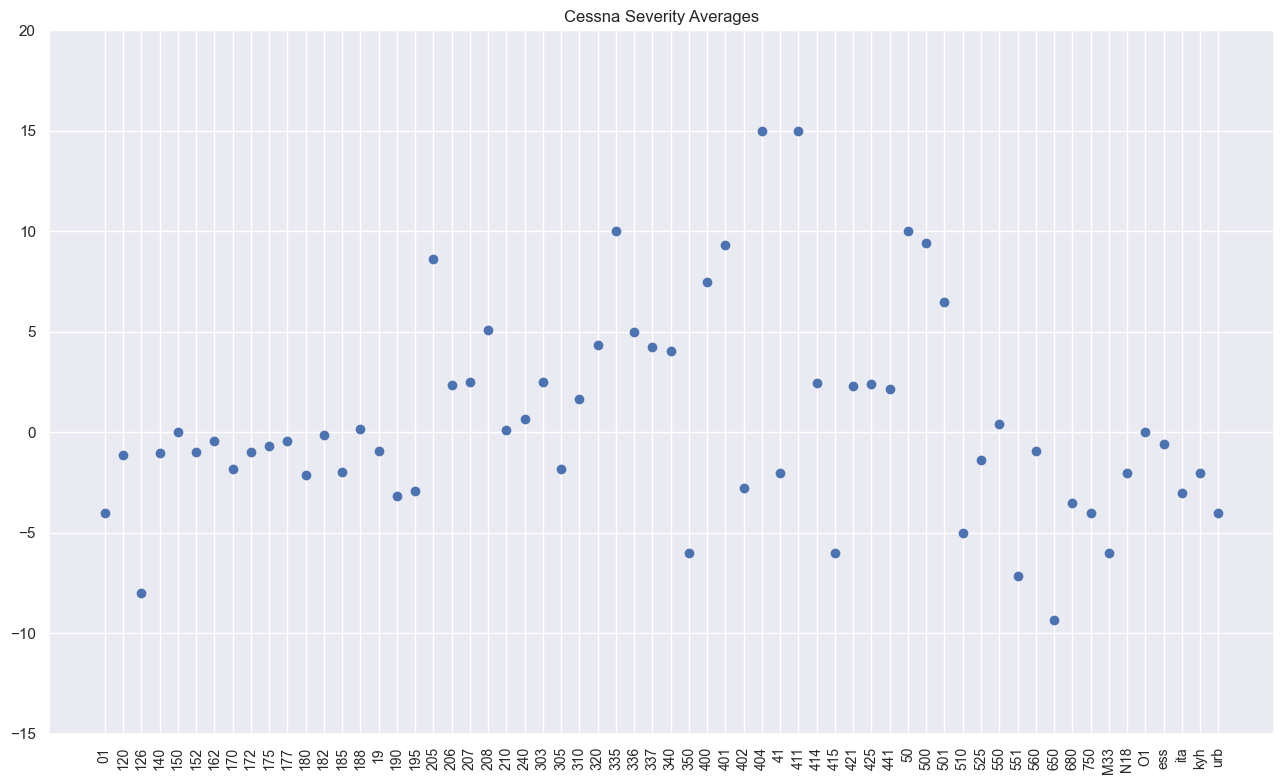

In [30]:
fig, ax = plt.subplots(figsize=(13,8))
ax.scatter(x=avg_sev_ratio_cessna_index, y=avg_sev_ratio_cessna_value, alpha=1)
ax.tick_params(axis='x', labelsize=10, labelrotation=90)
ax.set_title('Cessna Severity Averages')
ax.set_ylim(top=20, bottom=-15)
plt.tight_layout()

In [40]:
pd.DataFrame(df_Cessna['Model And Make'].value_counts()[:50])

,Model And Make
172,2021
182,871
150,495
210,412
180,333
152,303
170,223
185,204
206,201
177,170


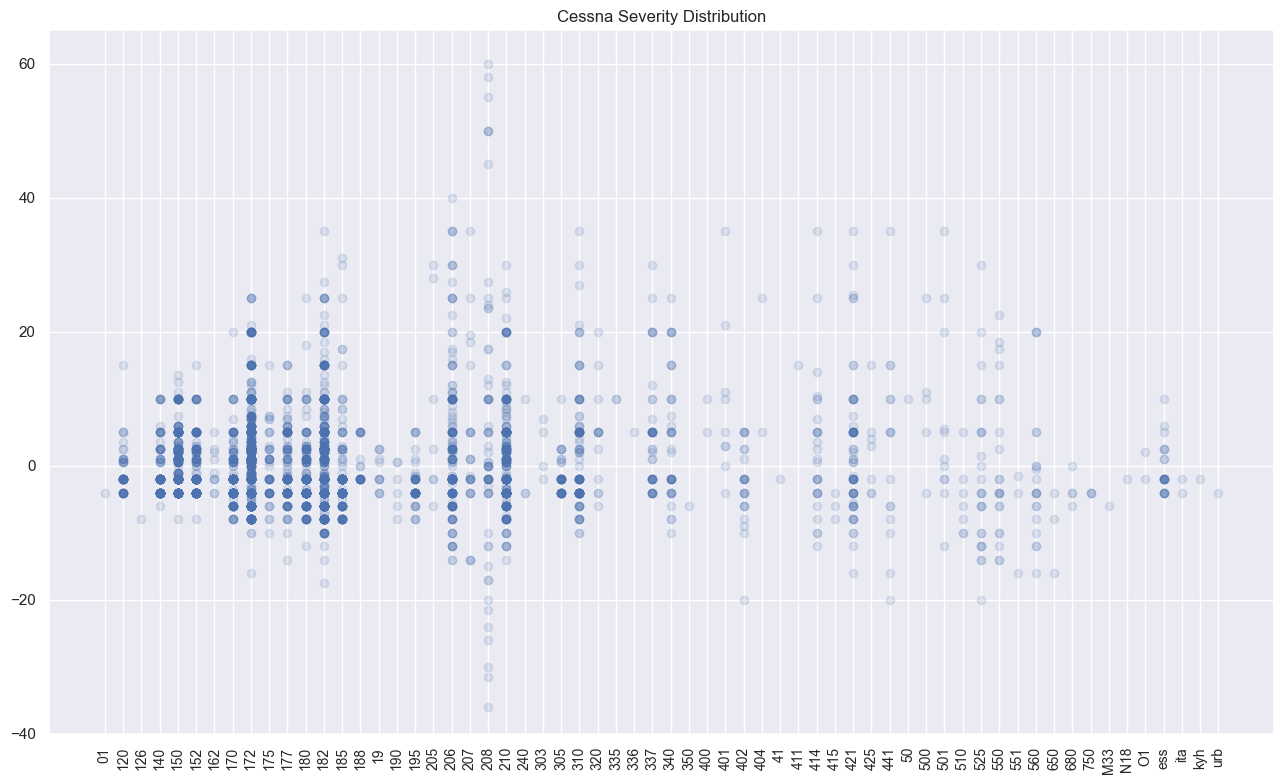

In [35]:
fig, ax = plt.subplots(figsize=(13,8))
ax.scatter(x='Model And Make', y='Severity Ratio', data= df_Cessna, alpha=0.15)
ax.tick_params(axis='x', labelsize=10, labelrotation=90)
ax.set_title('Cessna Severity Distribution')
ax.set_ylim(top=65, bottom=-40)
plt.tight_layout()
# do grouby mean then decide based off of that since its flat across the board

### recommend DHC6, DHC2 is not in production anymore

In [26]:
# Narrowing down best craft for De Havilland

df_DeHavilland = df_Private[(df_Private['Make'].isin(['De Havilland']))].reset_index(drop=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'De Havilland: ', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'Dehavilland: ', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= ' ', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= '-', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'BEAVER', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'Beaver', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'TIGERMOTH', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'VENOM', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'Venom', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'TwinOtter', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'TWINOTTER', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'VampireMK3', value='DH115', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'VAMPIRE', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'DHC', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'DH', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'] = df_DeHavilland['Model And Make'].str[:3]
df_DeHavilland['Model And Make'].replace(to_replace= 'MK', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'TW', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'T', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'L2', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= '/U', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'U', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'A', value='', inplace=True, regex=True)
df_DeHavilland = df_DeHavilland.sort_values('Model And Make')

In [27]:
# fig, ax = plt.subplots(figsize=(13,8))
# ax.scatter(x='Model And Make', y='Severity Ratio', data= df_DeHavilland, alpha=0.4)
# ax.tick_params(axis='x', labelsize=10, labelrotation=45)
# ax.set_title('DeHavilland Severity Scatter Plot')
# ax.set_ylim(top=50, bottom=-60)
# plt.tight_layout()